In [63]:
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [ ]:
def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

In [76]:
class Classroom:
    def __init__(me, length, width, unAvailableRoomSpace, numChairs, numTables, 
                 tableLength, tableWidth):
        me.class_x = width
        me.class_y = length
        me.unAvailableRoomSpace = unAvailableRoomSpace
        me.nChairs = numChairs
        me.nTables = numTables
        me.chairs = []
        me.tables = []
        if tableLength < tableWidth:
            me.table_long = tableWidth
            me.table_short = tableLength
        else:
            me.table_long = tableLength
            me.table_short = tableWidth
        me.table = [int(me.table_short),int(me.table_long)]
        me.chair_l = 2
            
        me.classroom = [[0 for i in range(me.class_x)] for j in range(me.class_y)]
        me.chair_placement = [[1 for i in range(me.class_x)] for j in range(me.class_y)]
        for i in range(me.class_y):
            me.chair_placement[i][me.class_x-1] = 0       
        for j in range(me.class_x):
            me.chair_placement[me.class_y-1][j] = 0  
        me.table_placement_ns = [[1 for i in range(me.class_x)] for j in range(me.class_y)]
        me.table_placement_ew = [[1 for i in range(me.class_x)] for j in range(me.class_y)]
        for i in range(me.class_y):
            for j in range(me.class_x):
                if j >= me.class_x-(me.table_long-1) or i >= me.class_y-(me.table_short-1):
                    me.table_placement_ew[i][j] = 0
        for i in range(me.class_y):
            for j in range(me.class_x):
                if j >= me.class_x-(me.table_short-1) or i >= me.class_y-(me.table_long-1):
                    me.table_placement_ns[i][j] = 0
            
            
    def addChair(me,x,y,d):
        available = sum(x1.count(1) for x1 in me.chair_placement)
        if available <= 0:
            return -1

        #update classroom
        for i in range(y, y+me.chair_l):
            for j in range(x,x+me.chair_l):
                me.classroom[i][j] = 2

        #update table_placement_ns
        for i in range(y-me.table[1], y+me.chair_l+1):
            for j in range(x-me.table[0], x+me.chair_l+1):
                if i >= 0 and i < me.class_y and j >= 0 and j < me.class_x and me.table_placement_ns[i][j]!=0:
                    if i >= y-(me.table[1]-1) and i < y+me.chair_l and j >= x-(me.table[0]-1) and j < x+me.chair_l:
                        me.table_placement_ns[i][j] = 0
                    else:
                        if j == x+me.chair_l and i > y-me.table[1] and i < y+me.chair_l and(d>=315 or d<=45):
                            me.table_placement_ns[i][j] = me.table_placement_ns[i][j] + 1
                        if i == y-me.table[1] and j > x-me.table[0] and j < x+me.chair_l and d>=45 and d<=135:
                            me.table_placement_ns[i][j] = me.table_placement_ns[i][j] + 1
                        if j == x-me.table[0] and i > y-me.table[1] and i < y+me.chair_l and d>=135 and d<=225:
                            me.table_placement_ns[i][j] = me.table_placement_ns[i][j] + 1
                        if i == y+me.chair_l and j > x-me.table[0] and j < x+me.chair_l and d>=225 and d<=315:
                            me.table_placement_ns[i][j] = me.table_placement_ns[i][j] + 1

        #update table_placement_ew
        for i in range(y-me.table[0], y+me.chair_l+1):
            for j in range(x-me.table[1], x+me.chair_l+1):
                if i >= 0 and i < me.class_y and j >= 0 and j < me.class_x and me.table_placement_ew[i][j]!=0:
                    if  i >= y-(me.table[0]-1) and i < y+me.chair_l and j >= x-(me.table[1]-1) and j < x+me.chair_l:
                        me.table_placement_ew[i][j] = 0
                    else:
                        if j == x+me.chair_l and i > y-me.table[0] and i < y+me.chair_l and(d>=315 or d<=45):
                            me.table_placement_ew[i][j] = me.table_placement_ew[i][j] + 1
                        if i == y-me.table[0] and j > x-me.table[1] and j < x+me.chair_l and d>=45 and d<=135:
                            me.table_placement_ew[i][j] = me.table_placement_ew[i][j] + 1
                        if j == x-me.table[1] and i > y-me.table[0] and i < y+me.chair_l and d>=135 and d<=225:
                            me.table_placement_ew[i][j] = me.table_placement_ew[i][j] + 1
                        if i == y+me.chair_l and j > x-me.table[1] and j < x+me.chair_l and d>=225 and d<=315:
                            me.table_placement_ew[i][j] = me.table_placement_ew[i][j] + 1

        #change this
        #update chair_placement
        for i in range(me.class_y):
            for j in range(me.class_x):
                if math.sqrt((i-y)**2 + (j-x)**2) < 4:
                    me.chair_placement[i][j] = 0

        #add chair
        me.chairs.append([x,y,d])
        
    def addTable(me):
        #find highest position number in table_placeent_ns
        max_ns = 0
        for i in range(me.class_y-(me.table[1]-1)):
            for j in range(me.class_x-(me.table[0]-1)):
                if me.table_placement_ns[i][j] > max_ns:
                    max_ns = me.table_placement_ns[i][j]
        #find highest position number in table_placeent_ew
        max_ew = 0
        for i in range(me.class_y-(me.table[0]-1)):
            for j in range(me.class_x-(me.table[1]-1)):
                if me.table_placement_ew[i][j] > max_ew:
                    max_ew = me.table_placement_ew[i][j]

        #compare the highest position number in ns and ew
        if (max_ns >= max_ew):
            t = me.table_placement_ns
            table_x = me.table[0]
            table_y = me.table[1]
            m = max_ns
            ns_table = 1
        else:
            t = me.table_placement_ew
            table_x = me.table[1]
            table_y = me.table[0]
            m = max_ew
            ns_table = 0

        #count how many available positions there are for the specific table orientation
        available = sum(x.count(m) for x in t)

        #rng for which position
        num = math.ceil(random()*available)
        #put at that position
        for i in range(me.class_y-(table_y-1)):
            for j in range(me.class_x-(table_x-1)):
                if t[i][j] == m:
                    num -= 1
                if num == 0:
                    x = j
                    y = i
                    break
            if num == 0:
                break

        #update classroom
        for i in range(y, y+table_y):
            for j in range(x,x+table_x):
                me.classroom[i][j] = 1

        #update table_placement_ns
        for i in range(y-(me.table[1]-1), y+me.table[ns_table]):
            for j in range(x-(me.table[0]-1), x+me.table[1-ns_table]):
                if i >= 0 and i < me.class_y and j >= 0 and j < me.class_x:
                    me.table_placement_ns[i][j] = 0

        #update table_placement_ew
        for i in range(y-(me.table[0]-1), y+me.table[ns_table]):
            for j in range(x-(me.table[1]-1), x+me.table[1-ns_table]):
                if i >= 0 and i < me.class_y and j >= 0 and j < me.class_x:
                    me.table_placement_ew[i][j] = 0

        #add table
        me.tables.append([x, y, ns_table])
        
    def clearRoom(me):
        me.chairs = []
        me.tables = []
    
    def inputSolution(me, sol):
        me.sol = sol
        for i in range(me.nChairs):
            if (me.addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2])) == -1):
                print("Not enough space!")
        for i in range(me.nTables):
            if (me.addTable() == -1):
                print("Not enough space!")
    
    def showClassroom(me):
        # create discrete colormap
        cmap = colors.ListedColormap(['grey','blue','green'])
        bounds = [0,1,2,3]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        fig, ax = plt.subplots()
        ax.imshow(me.classroom, cmap=cmap, norm=norm)

        # draw gridlines
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        ax.set_xticks(np.arange(-.5, me.class_x, 5))
        ax.set_yticks(np.arange(-.5, me.class_y, 5))

        plt.show()
    
    def debugClassroom(me):
        print("Classroom:", end = "\n")
        for i in range(me.class_y):
            print(me.classroom[i], end = "\n")
        print("\n")
    
    def debugTables(me):
        print("ns Table:", end = "\n")
        for i in range(me.class_y):
            print(me.table_placement_ns[i], end = "\n")
        print("\n")
        print("ew Table:", end = "\n")
        for i in range(me.class_y):
            print(me.table_placement_ew[i], end = "\n")
        print("\n")
        
    def debugChairs(me):
        print("Chairs:", end = "\n")
        for i in range(me.class_y):
            print(me.chair_placement[i], end = "\n")
        print("\n")

In [82]:
class Optimizer:
    def __init__(me, class_y, class_x, students, chair_l):
        me.class_x = class_x
        me.class_y = class_y
        me.students = students
        me.chair_l = chair_l
        me.bnds = ()
        me.cons = []
        me.guess = []

    def setup(me):
        x_bnd = (0,me.class_x-2)
        y_bnd = (0,me.class_y-2)
        d_bnd = (0,4*math.pi)
        for i in range(me.students):
            me.bnds = me.bnds + (x_bnd,y_bnd,d_bnd)
            
        for i in range(me.students):
            me.guess.append(random()*me.class_x)
            me.guess.append(random()*me.class_y)
            me.guess.append(2*math.pi)
    
    def solve(me):
        me.sol = minimize(Optimizer.objective,me.guess,args=(me.class_x,me.class_y,me.chair_l),method='SLSQP',\
                bounds=me.bnds,constraints=me.cons)
        return me.sol
    
    def printRawSolution(me):
        for i in range(int(len(me.sol.x)/3)):
            print(me.sol.x[i*3:(i+1)*3], end = " ")
            
    def printSolution(me):
        for i in range(int(len(me.sol.x)/3)):
            print(round(me.sol.x[i*3]), end = " ")
            print(round(me.sol.x[i*3+1]), end = " ")
            print(roundAngle(me.sol.x[i*3+2]))
    
    def objective(z, class_x, class_y, chair_l):
        p = 0
        #real students to fake students/boundary
        r = 4
        fakeStudents = 0
        fstudents = []
        for i in range(0,class_x-chair_l+1,2):
            fstudents.append(i)
            fstudents.append(-r)
            fstudents.append(i)
            fstudents.append(class_y-chair_l+r)
            fakeStudents = fakeStudents + 2
        for i in range(0,class_y-chair_l+1,2):
            fstudents.append(-r)
            fstudents.append(i)
            fstudents.append(class_x-chair_l+r)
            fstudents.append(i)
            fakeStudents = fakeStudents + 2
        for i in range(1,r):
            fstudents.append(class_x-chair_l+i)
            fstudents.append(-r+i)
            fstudents.append(class_x-chair_l+r-i)
            fstudents.append(class_y-chair_l+i)
            fstudents.append(-i)
            fstudents.append(class_y-chair_l+r-i)
            fstudents.append(-r+i)
            fstudents.append(-i)
            fakeStudents = fakeStudents + 4

        #start p computations
        for i in range(int(len(z)/3)):
            #real to fake students
            for j in range(int(len(fstudents)/2)):
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2]
                x2 = fstudents[j*2]
                y2 = fstudents[j*2+1]

                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

                p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))

            #real to real students    
            for j in range(int(len(z)/3)):
                if i != j:
                    #equation
                    x1 = z[i*3]
                    y1 = z[i*3+1]
                    d1 = z[i*3+2] 
                    x2 = z[j*3]
                    y2 = z[j*3+1]

                    #depends on angle of first student
                    x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                    y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

                    p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                    p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
        return p

In [83]:
c1 = Classroom(20,20,[],10,3,6,2)

o1 = Optimizer(c1.class_y, c1.class_x, c1.nChairs, c1.chair_l)
o1.setup()
o1.solve()
c1.inputSolution(o1.sol)

17.0 6.0 180
9.0 18.0 90
3.0 17.0 45
9.0 0.0 270
3.0 1.0 315
15.0 1.0 225
1.0 6.0 0
15.0 17.0 135
1.0 12.0 0
17.0 12.0 180


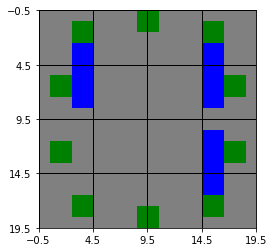

In [84]:
o1.printSolution()
c1.showClassroom()